# 1.Табличные данные

In [1]:
import pandas as pd
import pylab as plt
import seaborn as sb

%matplotlib inline

sb.set()

df = pd.read_csv('undead.csv', index_col=0)
df[:10]

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost
7,0.405680,0.253277,0.441420,0.280324,green,Goblin
8,0.399331,0.568952,0.618391,0.467901,white,Goblin
11,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
12,0.314295,0.671280,0.417267,0.227548,blue,Ghost


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 897
Data columns (total 6 columns):
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), object(2)
memory usage: 20.3+ KB


In [3]:
df.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


In [4]:
df.describe(include=object)

,color,type
count,371,371
unique,6,3
top,white,Ghoul
freq,137,129


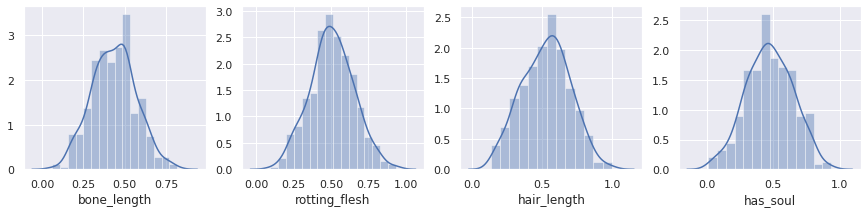

In [5]:
fig, axes = plt.subplots(1, 4, figsize= (15,3))
for (i,feature) in enumerate(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']):
    sb.distplot(df[feature], ax=axes[i])

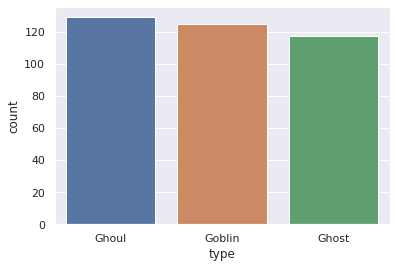

In [6]:
sb.countplot(x='type', data=df)

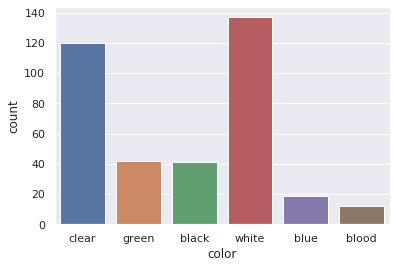

In [7]:
sb.countplot(x='color', data=df)

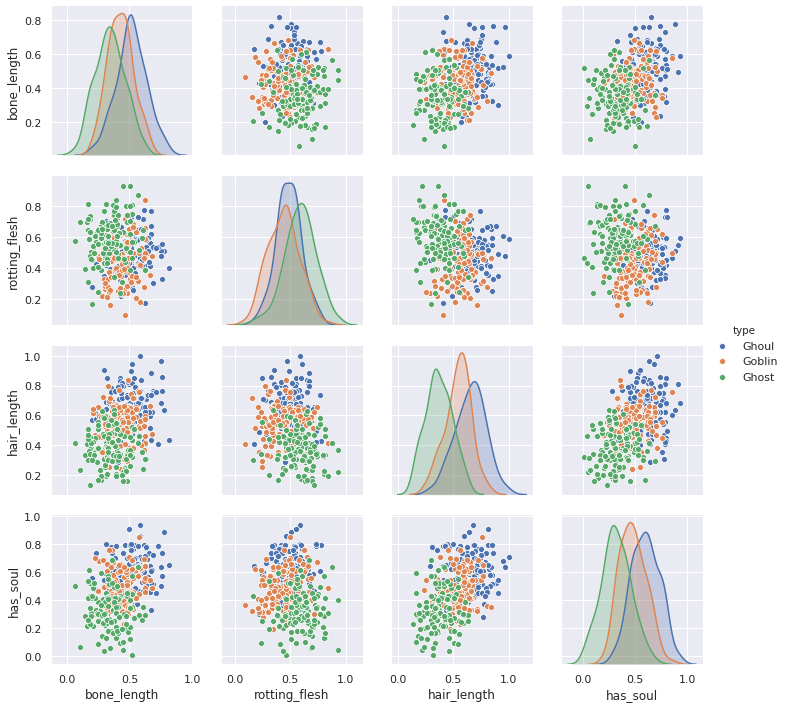

In [8]:
sb.pairplot(data=df, hue='type')

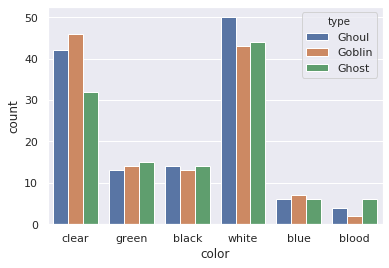

In [9]:
sb.countplot(data=df, x='color', hue='type')

# 2. Корпус документов

In [10]:
import re

messages = []
labels = []

dictionary = {}

with open('spam.csv') as file:
    for line in file:
        line_split = line.split(',', 1)
        if len(line_split) == 1:
            continue
        if line_split[0] not in ['spam', 'ham']:
            continue
        messages.append(line_split[1])
        labels.append(line_split[0])
        
        message_split = re.findall(r"[\w']+", line_split[1])
        for word in message_split:
            dictionary.setdefault(word, 0)
            dictionary[word] += 1
            
df_dict = pd.DataFrame(
            data={'word': list(dictionary.keys()), 'freq': list(dictionary.values())}
          ).sort_values(by='freq',ascending=False)
df_spam = pd.DataFrame({'label': labels, 'message':messages})

In [11]:
df_spam[:10]

,label,message
0,ham,"""Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"""Nah I don't think he goes to usf, he lives ar..."
5,spam,"""FreeMsg Hey there darling it's been 3 week's ..."
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [12]:
df_dict[:10]

,word,freq
32,to,2158
88,you,1833
62,I,1541
29,a,1340
165,the,1212
80,and,868
7,in,843
182,i,830
105,is,815
24,u,809


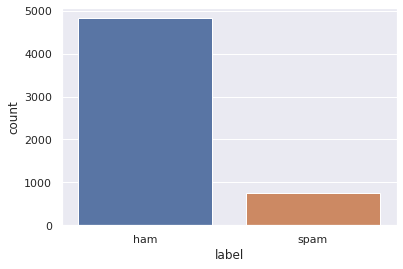

In [13]:
sb.countplot(data=df_spam, x='label')

<BarContainer object of 10 artists>

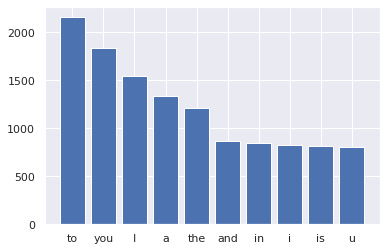

In [14]:
plt.bar(x=df_dict['word'][:10], height=df_dict['freq'][:10])